In [0]:
business_json_path =  "yelp_academic_dataset_business.json"
checkin_json_path =  "yelp_academic_dataset_checkin.json"
tip_json_path =  "yelp_academic_dataset_tip.json"
reviews_json_path =  "yelp_academic_dataset_review.json"
attributes_csv_path = 'yelp_business_attributes.csv'

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import pickle

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"10jaNdkz9a_cX8Pq1dKm7ypJKcbEdQGp3"})
downloaded.GetContentFile('saved_df.csv')

In [0]:
df = pd.read_csv('saved_df.csv')

In [0]:
import etl
import eda
from preprocess import TextProcessor

In [0]:
#Extract data
etl_worker = etl.ETL( business_json_path, checkin_json_path, reviews_json_path, ['VA', 'NC'])

In [0]:
# Format data
tp = TextProcessor(etl_worker.df)
tp.update_feats()
df = tp.df

In [0]:
df = pd.read_csv(etl.DATA_DIR + '/data/saved_df.csv')

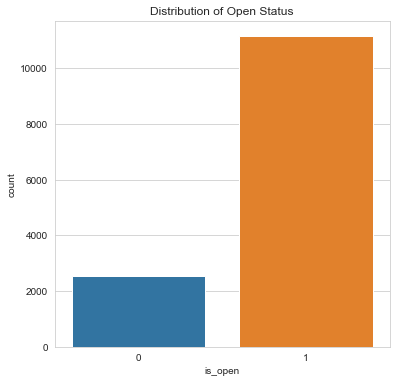

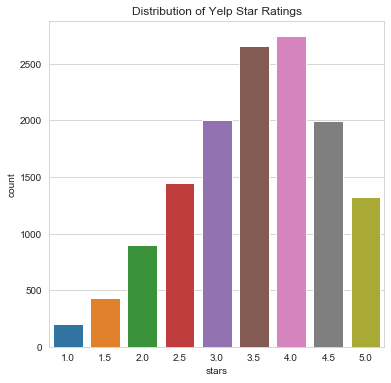

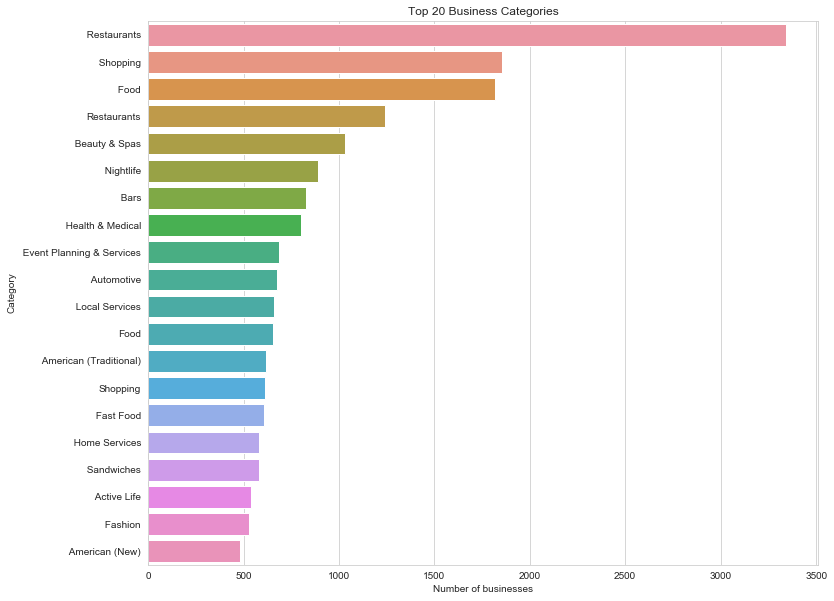

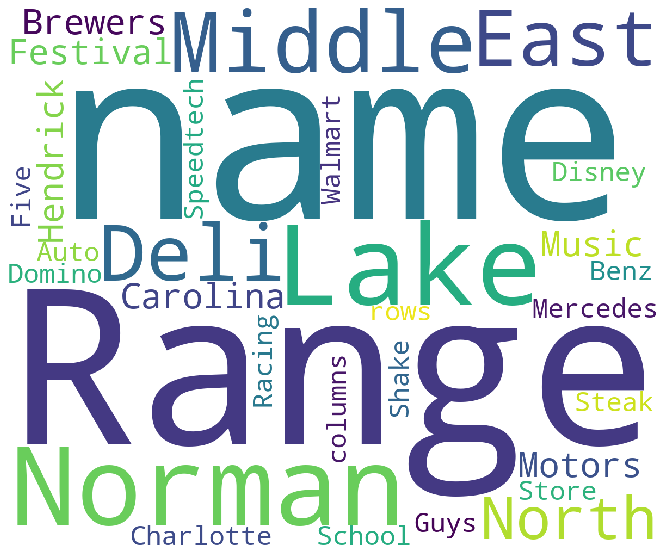

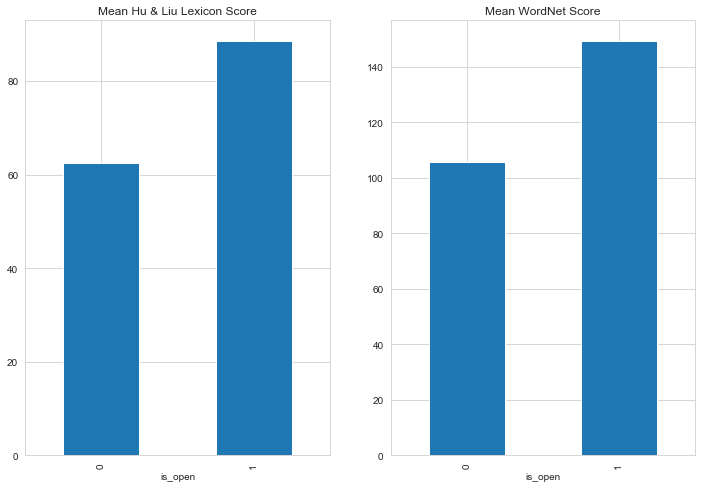

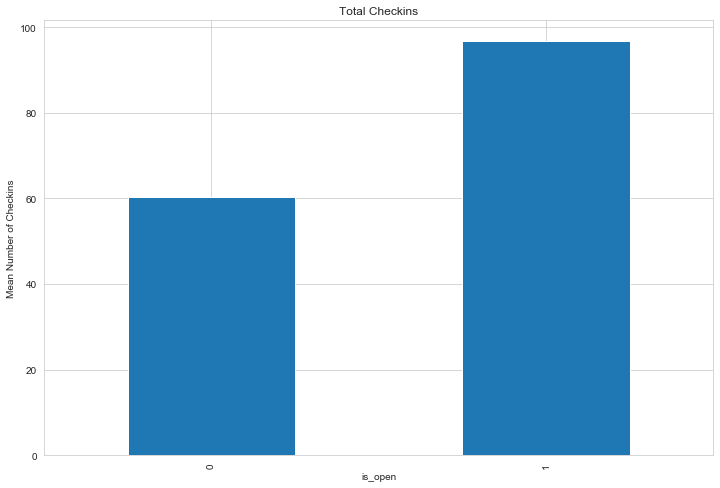

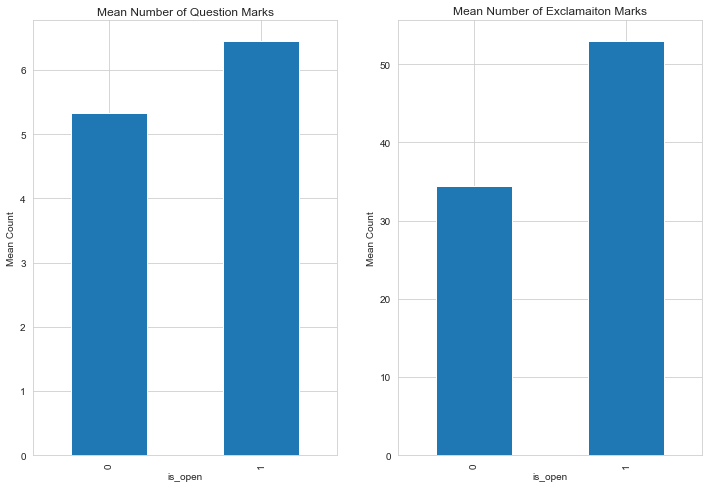

In [0]:
# EDA
%matplotlib inline
eda.show_all(df)

In [0]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'checkins', 'interval',
       'MedianStars', 'MeanStars', 'text', 'e', 'q', 'punc', 'chars', 'words',
       'sent_1_score', 'sent_1_rate', 'sent_1_pct', 'sent_1_nct',
       'sent_2_score', 'sent_2_rate', 'sent_2_pct', 'sent_2_nct'],
      dtype='object')

In [0]:
cols = ['stars', 'review_count', 'checkins', 'interval', 'MedianStars', 'MeanStars', 'e', 'q', 'chars', 'sent_1_score', 'sent_1_rate', 'sent_1_nct', 'sent_1_pct', 'sent_2_score', 'sent_2_rate', 'sent_2_pct', 'sent_2_nct']

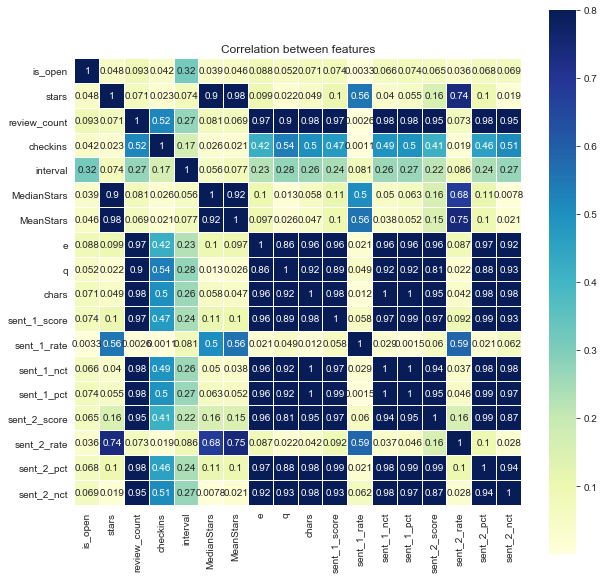

In [0]:
corr_matrix = X_res[ ['is_open', 'stars', 'review_count', 'checkins', 'interval', 'MedianStars', 'MeanStars', 'e', 'q', 'chars', 'sent_1_score', 'sent_1_rate', 'sent_1_nct', 'sent_1_pct', 'sent_2_score', 'sent_2_rate', 'sent_2_pct', 'sent_2_nct']].corr()
corr_matrix
import seaborn
plt.figure(figsize=(10, 10))
seaborn.heatmap(abs(corr_matrix), vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

In [0]:
X_res.isnull().sum()

stars           0
review_count    0
checkins        0
interval        0
MedianStars     0
MeanStars       0
e               0
q               0
chars           0
sent_1_score    0
sent_1_rate     0
sent_1_nct      0
sent_1_pct      0
sent_2_score    0
sent_2_rate     0
sent_2_pct      0
sent_2_nct      0
is_open         0
dtype: int64

In [0]:
X_res.describe()

,stars,review_count,checkins,interval,MedianStars,MeanStars,e,q,chars,sent_1_score,sent_1_rate,sent_1_nct,sent_1_pct,sent_2_score,sent_2_rate,sent_2_pct,sent_2_nct
count,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000,15610.000000
mean,3.479748,31.000128,74.677002,1398.269122,3.660444,3.481014,43.946124,5.765919,15250.322293,76.127512,0.022129,284.993183,548.339303,128.817768,0.034741,199.654888,70.837121
std,0.870397,67.414911,184.066559,1094.014358,1.224011,0.858020,103.399235,13.018836,33213.655319,170.575395,0.008790,626.620643,1171.524037,326.555324,0.022184,470.035997,157.100009
min,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,312.000000,-7.125000,-0.035473,1.000000,6.000000,-489.000000,-0.081081,0.000000,0.000000
25%,3.000000,5.000000,5.000000,426.000000,3.000000,2.962267,5.000000,0.000000,2315.500000,11.250000,0.017126,41.011970,84.443945,14.034278,0.021240,27.616811,9.993151
50%,3.500000,10.000000,17.000000,1201.500000,4.000000,3.545455,13.000000,2.000000,5053.000000,24.937713,0.021975,92.000000,187.000000,34.460737,0.035056,59.233196,24.000000
75%,4.000000,29.000000,64.000000,2298.000000,4.917195,4.087866,40.000000,6.000000,13787.750000,68.265795,0.026974,258.000000,505.721439,104.937236,0.047513,173.000000,67.000000
max,5.000000,2028.000000,5063.000000,3616.000000,5.000000,5.000000,3580.000000,253.000000,919224.000000,4590.330000,0.084532,16849.000000,30914.000000,9300.000000,0.214286,13893.000000,5071.000000


In [0]:
cols = ['stars', 'is_open', 'review_count', 'checkins', 'interval', 'MedianStars', 'MeanStars', 'e', 'q', 'sent_1_score', 'sent_2_score', 'is_open']

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

df = df[['stars', 'is_open', 'review_count', 'checkins', 'interval', 'MedianStars', 'MeanStars', 'e', 'q', 'sent_1_score', 'sent_2_score']]

X = df.drop(['is_open'], axis=1)
y = df[['is_open']]

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

sm = SMOTE(random_state=31)
X_train, y_train = sm.fit_sample(X_train, y_train)

X_train_full, y_train_full = sm.fit_sample(X_train_full, y_train_full)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, 

In [0]:
pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

### Base Models

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


rf = RandomForestClassifier(
        n_estimators=500,
        min_samples_leaf=4,
        n_jobs=-1,
        max_features='sqrt',
        max_depth=None
    )
aboost = AdaBoostClassifier(
        n_estimators=100,
        learning_rate=0.05)

gboost = GradientBoostingClassifier(
        max_features='sqrt',
        n_estimators=300,
        learning_rate=0.01,
        max_depth=4,
        min_samples_leaf=1)

lin_svm = LinearSVC(
        C=1,
        fit_intercept=True)



knn = KNeighborsClassifier(
        n_neighbors=7,
        leaf_size=20,
        n_jobs=-1)

poly_svc = SVC(C=500, gamma=0.1)

models = [rf, aboost, gboost, lin_svm, knn]
    


### Eval Base Models

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import numpy as np

for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_true = y_val
    perc = lambda x: round(x * 100, 2)
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", perc( accuracy_score(y_true, y_pred)))
    print("Precision:", perc( precision_score(y_true, y_pred, average='weighted')))
    print("Recall:", perc( recall_score(y_true, y_pred, average='weighted')))
    print("F1:", perc(f1_score(y_true, y_pred, average='weighted')))
    print('\n')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Confusion Matrix:
 [[ 139  226]
 [ 145 1407]]
Accuracy: 80.65
Precision: 79.07
Recall: 80.65
F1: 79.69


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=100, random_state=None)
Confusion Matrix:
 [[ 242  123]
 [ 421 1131]]
Accuracy: 71.62
Precision: 79.97
Recall: 71.62
F1: 74.23


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           le

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
 [[263 102]
 [599 953]]
Accuracy: 63.43
Precision: 78.94
Recall: 63.43
F1: 67.35


KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')
Confusion Matrix:
 [[ 184  181]
 [ 344 1208]]
Accuracy: 72.61
Precision: 77.05
Recall: 72.61
F1: 74.35




### XGBoost initialization + Evaluation

In [0]:
import xgboost as xgb
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=2017, num_rounds=400):
    param = {}
    param['objective'] = 'multi:softmax'
    param['num_class'] = 7
    param['eta'] = 0.01
    param['max_depth'] = 5
    param['silent'] = 1
    param['eval_metric'] = 'merror'
    param['min_child_weight'] = 1
    param['subsample'] = 0.5
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return model,pred_test_y

In [0]:
test_y_pred = pd.DataFrame()
test_y_pred['id'] = y_test.index
test_y_pred['is_open'] = np.zeros_like(y_test.index)

In [19]:
kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=42)

for i, (train_index, test_index) in enumerate(skf.split(X_train_full, y_train_full)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    print(train_index, test_index, '!')
    X_train_, X_valid = X_train_full[train_index], X_train_full[test_index]
    y_train_, y_valid = y_train_full[train_index], y_train_full[test_index]
    model1,y = runXGB( X_train_,y_train_,X_valid,y_valid)
    test_pred = model1.predict(xgb.DMatrix((X_test)))
    test_y_pred['is_open'] += test_pred/kfold

[Fold 1/5]
[ 1907  1908  1909 ... 15607 15608 15609] [   0    1    2 ... 8486 8491 8500] !
[0]	train-merror:0.185858	test-merror:0.324472
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 100 rounds.
[1]	train-merror:0.171365	test-merror:0.321268
[2]	train-merror:0.185698	test-merror:0.319347


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[3]	train-merror:0.193065	test-merror:0.317425
[4]	train-merror:0.176249	test-merror:0.319026
[5]	train-merror:0.162396	test-merror:0.327354
[6]	train-merror:0.167521	test-merror:0.318386
[7]	train-merror:0.160394	test-merror:0.336003
[8]	train-merror:0.155589	test-merror:0.33312
[9]	train-merror:0.153748	test-merror:0.331198
[10]	train-merror:0.151345	test-merror:0.321268
[11]	train-merror:0.152066	test-merror:0.318706
[12]	train-merror:0.152146	test-merror:0.315823
[13]	train-merror:0.150865	test-merror:0.317104
[14]	train-merror:0.14582	test-merror:0.327034
[15]	train-merror:0.142377	test-merror:0.329276
[16]	train-merror:0.144379	test-merror:0.328956
[17]	train-merror:0.144539	test-merror:0.331839
[18]	train-merror:0.143418	test-merror:0.330878
[19]	train-merror:0.140695	test-merror:0.332479
[20]	train-merror:0.140135	test-merror:0.334081
[21]	train-merror:0.142136	test-merror:0.332479
[22]	train-merror:0.140695	test-merror:0.336963
[23]	train-merror:0.139174	test-merror:0.342729
[

In [60]:
# Final Model After Parameter Tuning

param = {}
param['eta'] = 0.001
param['max_depth'] = 5
param['silent'] = 0
param['objective'] = 'binary:logistic'
param['min_child_weight'] = 1
param['subsample'] = 0.6
param['colsample_bytree'] = 0.35
param['seed'] = 42
param['n_estimators'] = 200
param['num_rounds'] = 400

xgbc = xgb.XGBClassifier(**param)
xgbc.fit(X=X_train, y=y_train,  eval_set=[(X_val, y_val.is_open.values)], eval_metric='error', early_stopping_rounds=30)

[0]	validation_0-error:0.412624
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.282733
[2]	validation_0-error:0.271779
[3]	validation_0-error:0.271779
[4]	validation_0-error:0.270736
[5]	validation_0-error:0.271257
[6]	validation_0-error:0.267606
[7]	validation_0-error:0.271257
[8]	validation_0-error:0.22796
[9]	validation_0-error:0.229525
[10]	validation_0-error:0.225352
[11]	validation_0-error:0.220657
[12]	validation_0-error:0.214919
[13]	validation_0-error:0.218049
[14]	validation_0-error:0.209703
[15]	validation_0-error:0.209181
[16]	validation_0-error:0.210224
[17]	validation_0-error:0.206051
[18]	validation_0-error:0.206051
[19]	validation_0-error:0.206051
[20]	validation_0-error:0.206051
[21]	validation_0-error:0.2024
[22]	validation_0-error:0.206051
[23]	validation_0-error:0.203443
[24]	validation_0-error:0.2024
[25]	validation_0-error:0.201356
[26]	validation_0-error:0.194053
[27]	validation_0-error:0.194053
[28]	validation_0-error:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35, eta=0.001, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, num_rounds=400, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=0, subsample=0.6, verbosity=1)

In [66]:
y_true = y_val
y_pred = xgbc.predict(X_val)
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Accuracy:", perc( accuracy_score(y_true, y_pred)))
print("Precision:", perc( precision_score(y_true, y_pred, average='weighted')))
print("Recall:", perc( recall_score(y_true, y_pred, average='weighted')))
print("F1:", perc( f1_score(y_true, y_pred, average='weighted')))
print('\n')

Confusion Matrix:
 [[ 117  248]
 [ 104 1448]]
Accuracy: 81.64
Precision: 79.2
Recall: 81.64
F1: 79.79




### Base Models + PCA 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


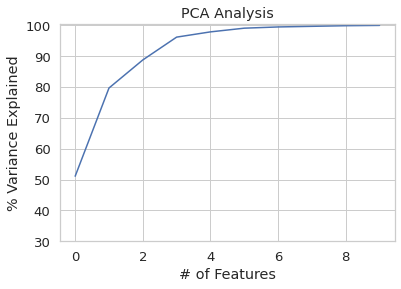

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

sm = SMOTE(random_state=31)
X_sc, y_sc = sm.fit_sample(X, y)

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_sc = pipeline.fit_transform(X_sc)

sb.set(font_scale=1.2,style="whitegrid")
covar_matrix = PCA(n_components = 10)
covar_matrix.fit(X_sc)
variance = covar_matrix.explained_variance_ratio_ 
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)


plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [0]:
pca_7 = PCA(n_components=5)
x_pca_7 = pca_7.fit_transform(X_train)

In [0]:
x_test_pca_7 = pca_7.transform(X_val)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

for model in models:
    print(model)
    model.fit(x_pca_7, y_train)
    y_pred = model.predict(x_test_pca_7)
    y_true = y_val
    perc = lambda x: round(x * 100, 2)
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", perc( accuracy_score(y_true, y_pred)))
    print("Precision:", perc( precision_score(y_true, y_pred, average='weighted')))
    print("Recall:", perc( recall_score(y_true, y_pred, average='weighted')))
    print("F1:", perc( f1_score(y_true, y_pred, average='weighted')))
    print('\n')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Confusion Matrix:
 [[ 215  150]
 [ 371 1181]]
Accuracy: 72.82
Precision: 78.82
Recall: 72.82
F1: 74.94


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=100, random_state=None)
Confusion Matrix:
 [[294  71]
 [633 919]]
Accuracy: 63.28
Precision: 81.19
Recall: 63.28
F1: 67.2


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learnin

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
 [[254 111]
 [604 948]]
Accuracy: 62.7
Precision: 78.11
Recall: 62.7
F1: 66.7


KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')
Confusion Matrix:
 [[ 212  153]
 [ 446 1106]]
Accuracy: 68.75
Precision: 77.26
Recall: 68.75
F1: 71.6




In [72]:
xgbc_pca = xgb.XGBClassifier(**param)
xgbc_pca.fit(X=x_pca_7, y=y_train,  eval_set=[(x_test_pca_7, y_val.is_open.values)], eval_metric='error', early_stopping_rounds=30, verbose=0)
y_pred = xgbc_pca.predict(x_test_pca_7)
y_true = y_val
perc = lambda x: round(x * 100, 2)
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Accuracy:", perc( accuracy_score(y_true, y_pred)))
print("Precision:", perc( precision_score(y_true, y_pred, average='weighted')))
print("Recall:", perc( recall_score(y_true, y_pred, average='weighted')))
print("F1:", perc( f1_score(y_true, y_pred, average='weighted')))
print('\n')

Confusion Matrix:
 [[ 247  118]
 [ 478 1074]]
Accuracy: 68.91
Precision: 79.43
Recall: 68.91
F1: 72.0




### Tune Hyperparameters for Base Models

In [0]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Tune RF 
param_grid = {'max_features':['sqrt', 0.5, 0.8], 'min_samples_leaf':[2, 4, 8], 'min_samples_split':[2, 4, 6], 'n_estimators':[100, 200, 400, 500, 1000]}
clf_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1', cv=3,verbose=20, n_jobs=-1)
clf_rf.fit(X_train_full, y_train_full)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
print("RF best params: ", clf_rf.best_params_)
print("Best Validation Score: ", clf_rf.best_score_)

RF best params:  {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}
Best Validation Score:  0.868736951520404


In [51]:
accuracy_score(clf_rf.best_estimator_.predict(X_val), y_val)

0.43401147626499736

In [52]:
# Tune Gradient Boosting
param_grid_gb = {'learning_rate':[0.01, 0.05, 0.08, 0.1], 'max_depth':[3,4,6], 'n_estimators':[100, 200, 500], 'min_samples_leaf':[1, 3, 5], 'min_samples_split':[2, 4, 6]}
clf_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, scoring='accuracy', cv=3,verbose=20, n_jobs=-1)
clf_gb.fit(X_train_full, y_train_full)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [54]:
accuracy_score(clf_gb.best_estimator_.predict(X_val), y_val)

0.40062597809076683

### Final Evaluation on Test Set Using Models With Best Hyperparameters 

In [64]:
models = [rf, gboost]
for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_true = y_test
    perc = lambda x: round(x * 100, 2)
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", perc( accuracy_score(y_true, y_pred)))
    print("Precision:", perc( precision_score(y_true, y_pred, average='weighted')))
    print("Recall:", perc( recall_score(y_true, y_pred, average='weighted')))
    print("F1:", perc(f1_score(y_true, y_pred, average='weighted')))
    print('\n')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Confusion Matrix:
 [[ 320  445]
 [ 279 3063]]
Accuracy: 82.37
Precision: 81.0
Recall: 82.37
F1: 81.51


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, 

In [63]:
#XGBoost Classifier
print(xgbc)
y_true = y_test
y_pred = xgbc.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Accuracy:", perc( accuracy_score(y_true, y_pred)))
print("Precision:", perc( precision_score(y_true, y_pred, average='weighted')))
print("Recall:", perc( recall_score(y_true, y_pred, average='weighted')))
print("F1:", perc(f1_score(y_true, y_pred, average='weighted')))
print('\n')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.35, eta=0.001, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, num_rounds=400, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=0, subsample=0.6, verbosity=1)
Confusion Matrix:
 [[ 260  505]
 [ 189 3153]]
Accuracy: 83.1
Precision: 80.93
Recall: 83.1
F1: 81.28


